In [268]:
# Import relevant libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [269]:
# Load the Sales_data dataset directly from Github
df = pd.read_csv('https://raw.githubusercontent.com/Lily-QianWang/schulich_data_science/main/sales_data.csv')

In [270]:
# Get a summary of the dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      946 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  946 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


In [257]:
# Sorting the data by Price in descending order
df.sort_values('Price',ascending=False)

,Product,Region,Price,Units Sold,Sale Date
969,Product_15,Region_8,2143.30,5.0,2024-08-27
853,Product_41,Region_1,713.29,10.0,2024-05-03
728,Product_31,Region_3,665.00,9.0,2023-12-30
814,Product_26,Region_2,623.60,12.0,2024-03-25
789,Product_7,NaN,605.87,NaN,2024-02-29
...,...,...,...,...,...
1002,Product_13,Region_3,NaN,8.0,2022-04-05
1006,Product_41,Region_3,NaN,18.0,2023-01-26
1028,Product_42,Region_6,NaN,8.0,2024-01-19
1046,Product_1,Region_6,NaN,8.0,2022-08-02


In [258]:
# Sorting the data by Units Sold in descending order
df.sort_values('Units Sold',ascending=False)

,Product,Region,Price,Units Sold,Sale Date
719,Product_50,Region_4,86.73,22.0,2023-12-21
221,Product_5,Region_5,50.36,20.0,2022-08-10
912,Product_22,Region_8,NaN,19.0,2024-07-01
962,Product_13,Region_7,0.61,19.0,2024-08-20
232,Product_14,Region_3,104.27,19.0,2022-08-21
...,...,...,...,...,...
990,NaN,Region_2,NaN,NaN,2024-09-17
1005,Product_15,NaN,59.91,NaN,2022-05-17
1012,Product_40,Region_8,92.70,NaN,2023-05-17
1013,Product_22,Region_9,141.53,NaN,2022-05-26


In [259]:
# Descriptive statistics
df.describe()

,Price,Units Sold
count,945.000000,946.000000
mean,107.598688,10.048626
std,124.020322,3.172261
min,0.200000,2.000000
25%,29.430000,8.000000
50%,78.130000,10.000000
75%,142.570000,12.000000
max,2143.300000,22.000000


In [260]:
# Handling missing values: fill in empty price and units sold value with corresponding median value 
df['Price'].fillna(df['Price'].median(), inplace=True)
df['Units Sold'].fillna(df['Units Sold'].median(), inplace=True)

# Dropping all rows with the missing data bases on the columns of 'Product', 'Region' and 'Sale Date'
df.dropna(subset='Product',inplace=True)
df.dropna(subset='Region',inplace=True)
df.dropna(subset='Sale Date',inplace=True)


# Removing duplicates: check for duplicates and drop if any
df.drop_duplicates(inplace=True)

# Correcting data entry errors: replace any negative 'Price' values with the median price
df.loc[df['Price'] < 0, 'Price'] = df['Price'].median()

# Correcting data entry errors: replace any negative 'Units Sold' values with the median price
df.loc[df['Units Sold'] < 0, 'Units Sold'] = df['Units Sold'].median()


# Addressing outliers: remove rows where 'Price' is greater than 3 standard deviations from the mean
price_mean = df['Price'].mean()
price_std = df['Price'].std()
df = df[(df['Price'] >= price_mean - 3 * price_std) & (df['Price'] <= price_mean + 3 * price_std)]


# Addressing outliers: remove rows where 'Units Sold' is greater than 3 standard deviations from the mean
unit_sold_mean = df['Units Sold'].mean()
unit_sold_std = df['Units Sold'].std()
df = df[(df['Units Sold'] >= unit_sold_mean - 3 * unit_sold_std) & (df['Units Sold'] <= unit_sold_mean + 3 * unit_sold_std)]

df.sort_values('Price',ascending=False)




,Product,Region,Price,Units Sold,Sale Date
605,Product_29,Region_10,460.20,7.0,2023-08-29
551,Product_50,Region_8,447.75,11.0,2023-07-06
275,Product_16,Region_4,433.17,13.0,2022-10-03
500,Product_40,Region_6,426.02,10.0,2023-05-16
624,Product_17,Region_10,420.47,5.0,2023-09-17
...,...,...,...,...,...
132,Product_39,Region_5,0.37,13.0,2022-05-13
397,Product_10,Region_9,0.33,3.0,2023-02-02
347,Product_9,Region_5,0.31,9.0,2022-12-14
201,Product_24,Region_4,0.22,10.0,2022-07-21


In [261]:
df.describe()

,Price,Units Sold
count,796.000000,796.000000
mean,95.090804,10.070352
std,83.547775,3.036064
min,0.200000,2.000000
25%,32.645000,8.000000
50%,78.130000,10.000000
75%,124.437500,12.000000
max,460.200000,19.000000


In [262]:
df

,Product,Region,Price,Units Sold,Sale Date
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05
5,Product_45,Region_1,8.63,11.0,2022-01-06
6,Product_31,Region_3,23.73,6.0,2022-01-07
...,...,...,...,...,...
988,Product_42,Region_9,240.97,10.0,2024-09-15
993,Product_7,Region_9,128.51,17.0,2024-09-20
994,Product_1,Region_4,95.24,7.0,2024-09-21
998,Product_2,Region_10,43.44,15.0,2024-09-25


In [263]:
# Create new variable 'Sales'
df["Sales"] = df["Price"] * df["Units Sold"]

# Converting data types: convert 'Region' variable to a categorical data type
df['Region'] = df['Region'] .astype('category')

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 796 entries, 2 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Product     796 non-null    object  
 1   Region      796 non-null    category
 2   Price       796 non-null    float64 
 3   Units Sold  796 non-null    float64 
 4   Sale Date   796 non-null    object  
 5   Sales       796 non-null    float64 
dtypes: category(1), float64(3), object(2)
memory usage: 38.5+ KB


<Axes: xlabel='Product', ylabel='Sales'>

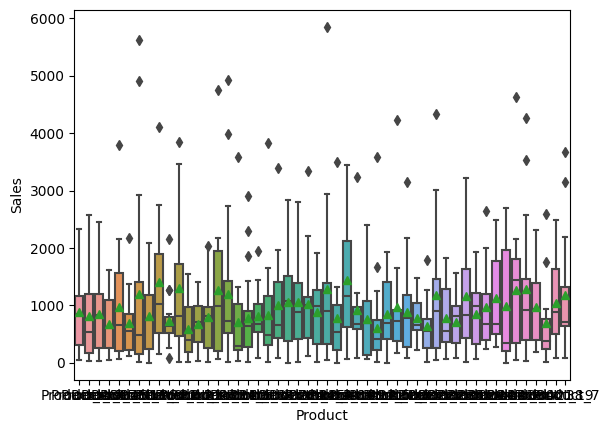

In [267]:
# Drawing boxplot shows how 'Product' influence on 'Sales'
sns.boxplot(data= df, x='Product',y='Sales', showmeans=True)


<Axes: xlabel='Region', ylabel='Sales'>

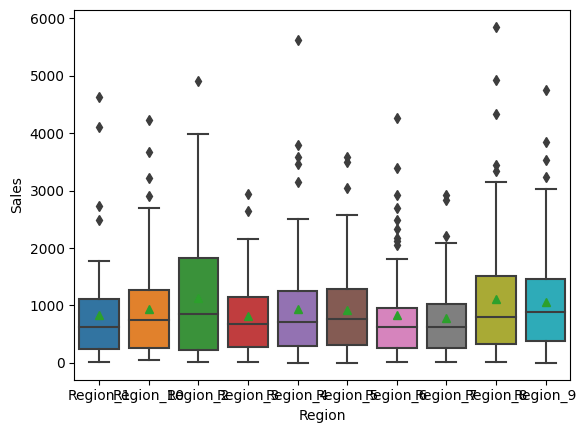

In [87]:
sns.boxplot(data= df, x='Region',y='Sales', showmeans=True)


<Axes: xlabel='Product', ylabel='Price'>

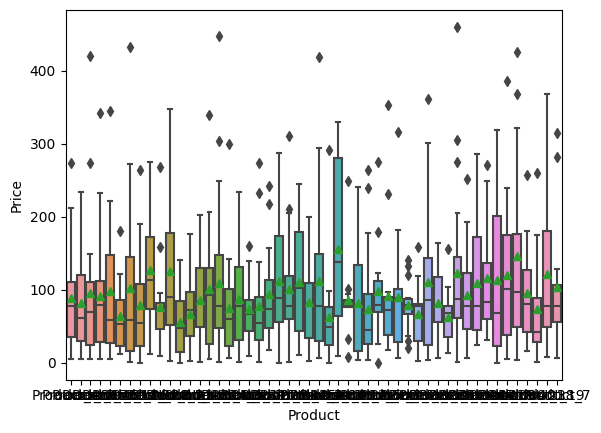

In [88]:
sns.boxplot(data= df.reset_index(), x='Product',y='Price', showmeans=True)

<Axes: xlabel='Region', ylabel='Price'>

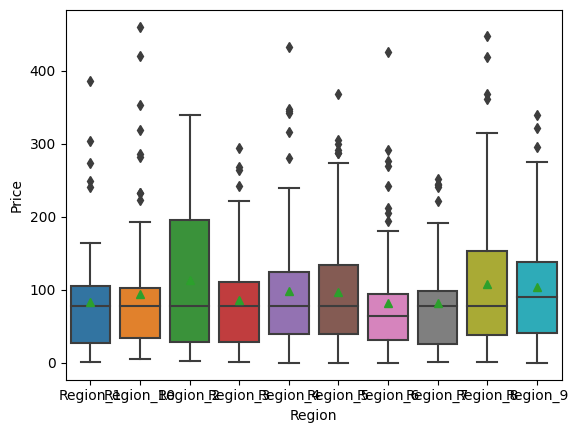

In [89]:
sns.boxplot(data= df.reset_index(), x='Region',y='Price', showmeans=True)

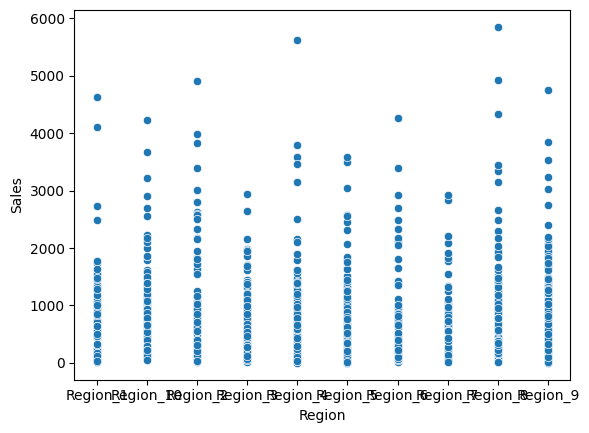

In [264]:
sns.scatterplot(x='Region', y='Sales', data=df)
plt.show()

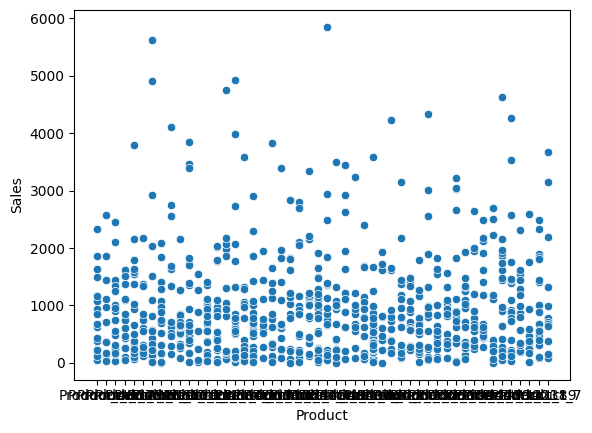

In [93]:
sns.scatterplot(x='Product', y='Sales', data=df)
plt.show()

<Axes: xlabel='Region', ylabel='Sales'>

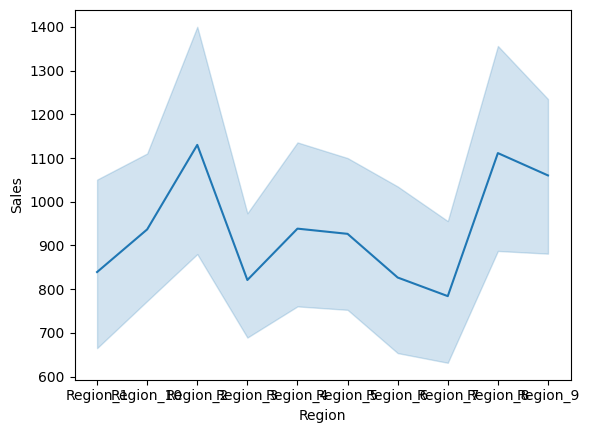

In [108]:
sns.lineplot(data=df, x="Region", y="Sales")

<Axes: xlabel='Product', ylabel='Sales'>

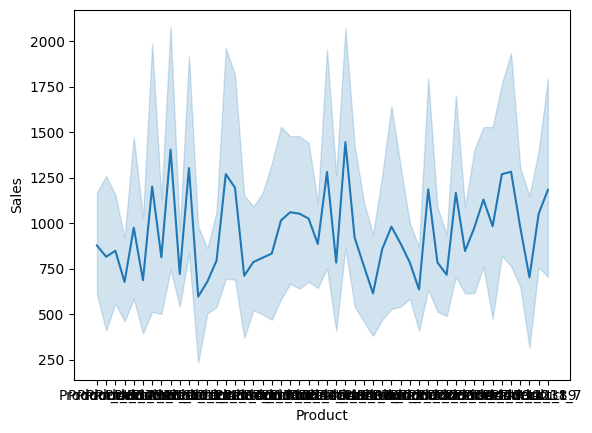

In [205]:
sns.lineplot(data=df, x="Product", y="Sales")

In [215]:
# Count how many unique regions in the dataset
df['Region'].nunique()

10

array([[<Axes: xlabel='Product'>],
       [<Axes: xlabel='Product'>],
       [<Axes: xlabel='Product'>],
       [<Axes: xlabel='Product'>],
       [<Axes: xlabel='Product'>],
       [<Axes: xlabel='Product'>],
       [<Axes: xlabel='Product'>],
       [<Axes: xlabel='Product'>],
       [<Axes: xlabel='Product'>],
       [<Axes: xlabel='Product'>]], dtype=object)

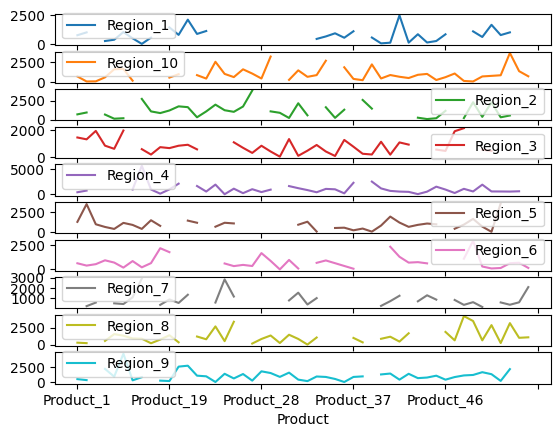

In [265]:
df.pivot_table( index='Product', columns='Region', values='Sales'
              ).plot(subplots=True, layout=(10,1))

1)	What conclusions can you draw about sales performance of various products and regions?
For this e-commerce company that sells a variety of products, after the data cleaning, we can properly analyze the data without ambiguity of the data. I want to analyze the sales performance of various products and regions, but there is no variable for me to analyze the sales. From my perspective, the sales are mostly presented by the performance of ‘Unit Sold’ and ‘Price’. Thus, I create a new variable ‘Sales’ which is the product of ‘Price’ and ‘Unit Sold’. To analyze how different regions influence sales, I set the ‘Regions’ to be categorical so that it will be easier for me to use related functions to see the performance of each region. 
For further analysis, several boxplots are drawn. The first boxplot analyses how different product types influence sales, and the second boxplot analyses how different regions influence sales. From the first and second boxplots, I conclude that some regions and products have better sales than others. The third boxplot shows how the prices are arranged for different products, and the fourth boxplot shows different regions buy different prices of products. Based on these two boxplots, I see that some regions might have more products with higher prices, and some products are sold with higher prices overall. To get which specific product sells more overall or which region sells more overall, I plot the scatter plots since the height of the dot could give me the specific information. In the end, I draw three line graphs, these three line graphs double confirm how the overall trend of sales different among different regions and products.  In conclusion, regions and products can influence sales overall. Some regions sell more products or set the product at higher prices, while some products are more expensive or are sold more in general. 
2)	What recommendations do you have for the business?
We realize that some regions have better sales performance than other regions from the second boxplot. Thus we can increase business activities around these areas by selecting the regions according to the first scatterplot. While some products sell better than other products based on the first boxplot, then we can focus on selling these products or increasing the price of these products by selecting the products according to the second scatterplot. The third boxplot shows some products are more expansive and some products are cheaper. We can sell cheaper products in the regions that do not buy more expensive products according to the fourth boxplot. Similarly, we can sell more expensive products in the regions where buy more expensive products according to the fourth boxplot.
3)	Describe your data cleaning approach. How and why did you decide on which cleaning techniques to use?
After importing and reading the data, I take a broad look at the data. Firstly, I get a summary of the dataset structure by using the function of info(). There are 5 variables which are ‘Product’, ‘Region’, ‘Price’, ‘Units Sold’ and ‘Sale Date’. The data type of ‘Product’, ‘Region’ and ‘Sale Date’ is object, and the data type of ‘Price’ and ‘Units Sold’ is float. Secondly, I use the function of sort_values() to see the descending order of the value of ‘Price’ and ‘Units Sold’. Thirdly, I use the function of describe() to see the statistical summary of the values of ‘Price’ and ‘Units Sold’. 
From the above investigation of data, several cleaning approaches need to be implemented. Firstly, I try to remove the impact of missing values in the dataset. I handle the missing values of ‘Price’ and ‘Units Sold’ by filling in empty values with corresponding median values since their data type is float. Also, filling by median will not impact the overall mean or median of the data set too much. I drop all rows with a missing database on the columns of 'Product', 'Region' and 'Sale Date' since their data type is the object. Secondly, I remove all the duplicates in the dataset. Thirdly, I correct data entry errors like the values of ‘Price’ and ‘Units Sold’ should not be negative by replacing any negative 'Price' and negative ‘Units Sold’ values with their corresponding median value. Finally, from the statistical summary and descending order of the value of ‘Price’ and ‘Units Sold’, I see there are outliers in these two variables, thus I remove rows where 'Price' and ‘Units Sold’ are greater than 3 standard deviations from the mean.
